这篇文章来自：https://flyai.com/article/681  

文章比较详细，包含了前面处理步骤的详细解释，后面有完整的项目流程和使用各种不同的模型进行预测以及模型间的比较。非常详细，也是很好的入门基础。  

这篇文章将详细讲解自然语言处理过程，基于机器学习和TFIDF的情感分类算法，并进行了各种分类算法（SVM、RF、LR、Boosting）对比。

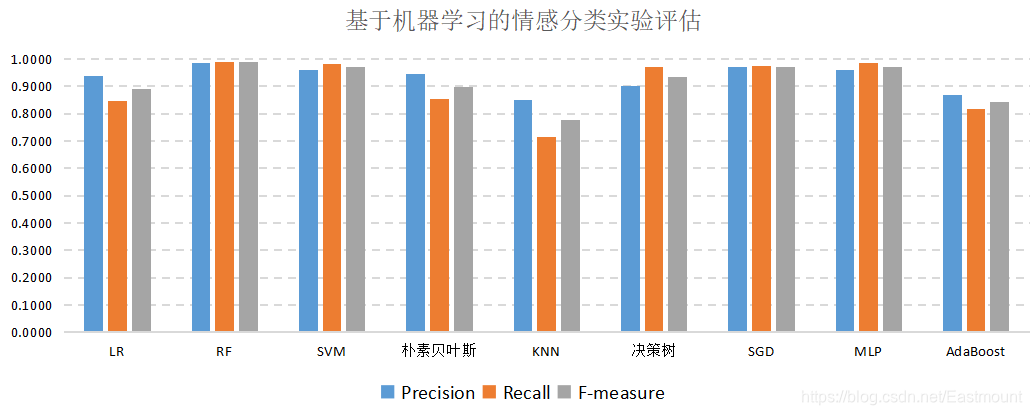

先放上测试结论。哈哈

在数据分析和数据挖掘中，通常需要经历前期准备、数据爬取、数据预处理、数据分析、数据可视化、评估分析等步骤，而数据分析之前的工作几乎要花费数据工程师近一半的工作时间，其中的数据预处理也将直接影响后续模型分析的好坏。图是数据预处理的基本步骤，包括中文分词、词性标注、数据清洗、特征提取（向量空间模型存储）、权重计算（TF-IDF）等。
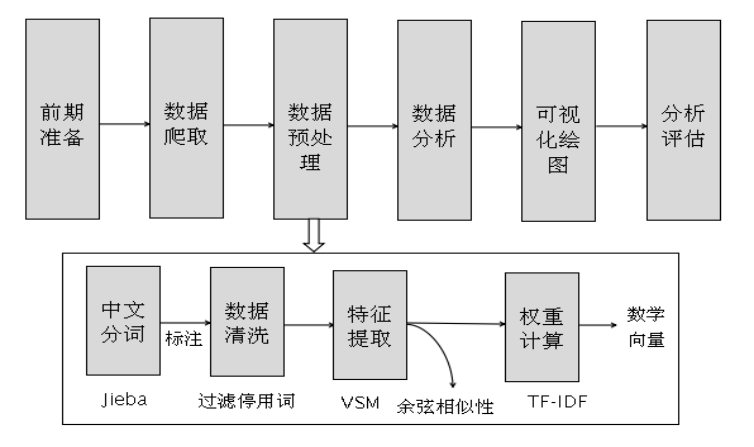



## 一.中文分词  
当拿到了中文数据集之后，首先需要对数据集进行中文分词处理。由于英文中的词与词之间是采用空格关联的，按照空格可以直接划分单词和词组，所以一般不需要进行分词处理，而中文汉字之间是紧密相连的，并且存在语义，词与词之间没有明显的分隔点，所以需要借助中文分词技术将语料中的句子按空格分割，变成一段段词序列。下面开始详细介绍中文分词技术及Jieba(结巴）中文分词工具。  

中文分词（Chinese Word Segmentation）指将汉字序列切分成一个个单独的词或词串序列，它能够在没有词边界的中文字符串中建立分隔标志，通常采用空格分隔。下面举个简单示例，对句子“我是程序员”进行分词操作。  
输入：我是程序员  
输出1：我\是\程\序\员  
输出2：我是\是程\程序\序员  
输出3：我\是\程序员  

下面的例子，可以试试这不同的两句话看看结果有什么区别。上面这个少一个学字，虽然对我们阅读没有造成太大困难，但是对于机器难度是大大增加了。这也能看出现在机器算法距离人还是有不少的差距。

In [3]:
#encoding=utf-8  
import jieba  
#text = "北京理工大学生前来应聘"  
text = "北京理工大学学生前来应聘"  
print("[原始信息]: ", text)
data = jieba.cut(text,cut_all=True)   #全模式
print("[全模式]: ", " ".join(data))
data = jieba.cut(text,cut_all=False)  #精确模式  
print("[精确模式]: ", " ".join(data))
data = jieba.cut(text)  #默认是精确模式 
print("[默认模式]: ", " ".join(data))
data = jieba.cut_for_search(text)  #搜索引擎模式   
print("[搜索引擎模式]: ", " ".join(data))

[原始信息]:  北京理工大学学生前来应聘
[全模式]:  北京 北京理工 北京理工大学 理工 理工大 理工大学 工大 大学 学学 学生 生前 前来 应聘
[精确模式]:  北京理工大学 学生 前来 应聘
[默认模式]:  北京理工大学 学生 前来 应聘
[搜索引擎模式]:  北京 理工 工大 大学 理工大 北京理工大学 学生 前来 应聘


## 二.数据清洗

在分析语料的过程中，通常会存在一些脏数据或噪声词组干扰我们的实验结果，这就需要对分词后的语料进行数据清洗（Data Cleaning）。比如前面使用Jieba工具进行中文分词，它可能存在一些脏数据或停用词，如“我们”、“的”、“吗”等。这些词降低了数据质量，为了得到更好的分析结果，需要对数据集进行数据清洗或停用词过滤等操作。
- 残缺数据
- 重复数据
- 错误数据
- 停用词
这里主要讲解停用词过滤，将这些出现频率高却不影响文本主题的停用词删除。在Jieb分词过程中引入stop_words.txt停用词词典，如果存在则过滤即可。 

下面是从大众点评、美团之类的网站抓取“黄果树瀑布”的评论信息，我们通过Jieba工具对其进行中文分词。  

好评：5000条  
差评：1000条  



In [10]:
# -*- coding:utf-8 -*-
import csv
import pandas as pd
import numpy as np
import jieba
import jieba.analyse
#添加自定义词典和停用词典
jieba.load_userdict("user_dict.txt")
#stop_list = pd.read_csv('stop_words.txt',engine='python',encoding='utf-8',delimiter="\n",names=['t'])['t'].tolist()
stop_list = [line.strip() for line in open('stop_words.txt', 'r',encoding='utf-8').readlines()]

#中文分词函数
def txt_cut(juzi):
    return [w for w in jieba.lcut(juzi) if w not in stop_list]
#写入分词结果
fw = open('fenci_data.csv', "a+", newline = '',encoding = 'utf-8')
writer = csv.writer(fw)  
writer.writerow(['content','label'])
# 使用csv.DictReader读取文件中的信息
labels = []
contents = []
file = "data.csv"
with open(file, "r", encoding="UTF-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        # 数据元素获取
        if row['label'] == '好评':
            res = 0
        else:
            res = 1
        labels.append(res)
        content = row['content']
        seglist = txt_cut(content)
        output = ' '.join(list(seglist))            #空格拼接
        contents.append(output)
        #文件写入
        tlist = []
        tlist.append(output)
        tlist.append(res)
        writer.writerow(tlist)
print(labels[:5])
print(contents[:5])
fw.close()

[0, 0, 0, 0, 0]
['记得 小时候 守 电视机 前 等候 西游记 播出 挑 担 牵 马 翻山 涉水 两肩 双滑 " 熟悉 歌曲 耳边 响起 时   歌词 中 水 贵州 水 准确 说 贵州 黄果树瀑布 那一帘 瀑布 流进 童年 流连忘返   黄果树瀑布 瀑布 景区 包括 陡坡 塘 瀑布 天星桥 景区 黄果树 瀑布 黄果树 瀑布 有名', '飞流直下三千尺   疑是 银河 落九天', '黄果树 瀑布 景区 位置 坐落 贵州省 安顺市 关岭 县 黄果树 风景区 贵州省 著名 景区 中国 最美 瀑布 享有 中华 第一 瀑布 美名 更是 世界 吉尼斯 纪录 里 认证 世界 瀑布群 说 瀑布群 蕴含着 大小 瀑布 十八个', '国家 重点 风景 名胜区 首批 国家 A 级 旅游 景区   黄果树 景区 时而 艳阳高照 时而 瓢泼大雨 当地人 说 多月 晴朗 天空 更是 下雨 如此这般 幸运 一会 晒 脸   一会 挨 浇     人品 爆棚 景区 风景秀丽 环境优美 值得 值得', '黄果树瀑布 群 值得一看 景区 黄果树瀑布 天星桥 景区 错过 天生桥 下方 珍珠 链 瀑布 值得一看 瀑布 黄果树 观景 距离 近多 触摸 水花 水汽 白链 如珠 水流 急 特别 壮观 实际上 危险 游玩 过后 星期 母子 瀑布 身亡 实际上 黄果树 瀑布 栏杆 外远观 无视 栏杆 走近 水边 急 水流 危险 可想而知']


## 三.特征提取及TF-IDF计算

### 1.基本概念  
权重计算是指通过特征权重来衡量特征项在文档表示中的重要程度，给特征词赋予一定的权重来衡量统计文本特征词。TF-IDF（Term Frequency-Invers Document Frequency）是近年来用于数据分析和信息处理经典的权重计算技术。该技术根据特征词在文本中出现的次数和在整个语料中出现的文档频率来计算该特征词在整个语料中的重要程度，其优点是能过滤掉一些常见却无关紧要的词语，尽可能多的保留影响程度高的特征词。  

TF-IDF的计算公式如下，式中TF-IDF表示词频TF和倒文本词频IDF的乘积，TF-IDF中权重与特征项在文档中出现的频率成正比，与在整个语料中出现该特征项的文档数成反比。TF-IDF值越大则该特征词对这个文本的重要程度越高。  
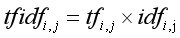

其中，TF词频的计算公式如下，ni,j 为特征词 ti 在训练文本 Dj 中出现的次数，分母是文本 Dj 中所有特征词的个数，计算的结果即为某个特征词的词频。

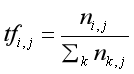

倒文档频率（Inverse Document Frequency，简称IDF）是Spark Jones在1972年提出的，用于计算词与文献相关权重的经典方法。计算公式如下，参数|D|表示语料的文本总数，|Dt| 表示文本所包含特征词 tj 的数量。

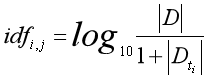

在倒文档频率方法中，权重是随着特征词的文档数量的变化呈反向变化。如某些常用词“我们”、“但是”、“的”等，在所有文档中出现频率很高，但它的IDF值却非常低。甚至如果它每篇文档都出现，则log1的计算结果为0，从而降低了这些常用词的作用；相反，如果某篇介绍“人工智能”的词，仅仅在该篇文档中出现很多次，它的作用就非常高。  

TF-IDF技术的核心思想是如果某个特征词在一篇文章中出现的频率TF高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力，适合用来做权重计算。TF-IDF算法简单快速，结果也符合实际情况，是文本挖掘、情感分析、主题分布等领域的常用手段。  

### 2.代码实现
Scikit-Learn中主要使用Scikit-Learn中的两个类CountVectorizer和TfidfTransformer，用来计算词频和TF-IDF值。  

**CountVectorizer** 
该类是将文本词转换为词频矩阵的形式。比如“I am a teacher”文本共包含四个单词，它们对应单词的词频均为1，“I”、“am”、“a”、“teacher”分别出现一次。CountVectorizer将生成一个矩阵 a[M][N]，共M个文本语料，N个单词，比如a[i][j]表示单词j在i类文本下的词频。再调用fit_transform()函数计算各个词语出现的次数，get_feature_names()函数获取词库中的所有文本关键词。  
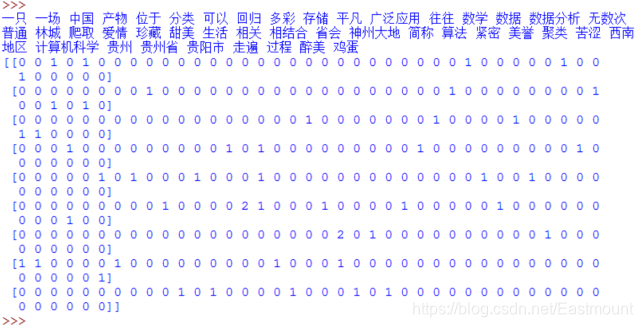

**TfidTransformer** 
当使用CountVectorizer类计算得到词频矩阵后，接下来通过TfidfTransformer类实现统计vectorizer变量中每个词语的TF-IDF值。TF-IDF值采用矩阵数组的形式存储，每一行数据代表一个文本语料，每一行的每一列都代表其中一个特征对应的权重，得到TF-IDF后就可以运用各种数据分析算法进行分析，比如聚类分析、LDA主题分布、舆情分析等等。  
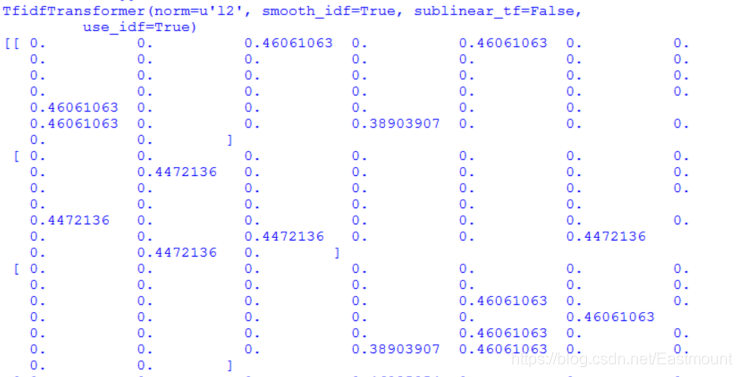



## 四. 完整代码
这里处理的数据来自fenci_data.csv，是前面已经做好数据清洗的输出文件。  
这也是工程上常用的一种做法，把工程分成几个阶段，中间通过外部数据相衔接。这样可以让几个开发阶段互相独立，开发内容互相分隔，方便分阶段处理。甚至在一个大的工程中，由不同的团队分别负责。

In [58]:
# -*- coding:utf-8 -*-
import csv
import pandas as pd
import numpy as np
import jieba
import jieba.analyse
from scipy.sparse import coo_matrix
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#----------------------------------第一步 读取文件--------------------------------
with open('fenci_data.csv', 'r', encoding='UTF-8') as f:
    reader = csv.DictReader(f)
    labels = []
    contents = []
    for row in reader:
        labels.append(row['label']) #0-好评 1-差评
        contents.append(row['content'])
print(labels[:5])
print(contents[:5])
#----------------------------------第二步 数据预处理--------------------------------
#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer()
#该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()
#第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(contents))
for n in tfidf[:5]:
    print(n)
print(type(tfidf))
# 获取词袋模型中的所有词语  
word = vectorizer.get_feature_names_out()
for n in word[:10]:
    print(n)
print("单词数量:", len(word))
#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
#X = tfidf.toarray()
X = coo_matrix(tfidf, dtype=np.float32).toarray() #稀疏矩阵 注意float
print(X.shape)
print(X[:10])

['0', '0', '0', '0', '0']
['记得 小时候 守 电视机 前 等候 西游记 播出 挑 担 牵 马 翻山 涉水 两肩 双滑 " 熟悉 歌曲 耳边 响起 时   歌词 中 水 贵州 水 准确 说 贵州 黄果树瀑布 那一帘 瀑布 流进 童年 流连忘返   黄果树瀑布 瀑布 景区 包括 陡坡 塘 瀑布 天星桥 景区 黄果树 瀑布 黄果树 瀑布 有名', '飞流直下三千尺   疑是 银河 落九天', '黄果树 瀑布 景区 位置 坐落 贵州省 安顺市 关岭 县 黄果树 风景区 贵州省 著名 景区 中国 最美 瀑布 享有 中华 第一 瀑布 美名 更是 世界 吉尼斯 纪录 里 认证 世界 瀑布群 说 瀑布群 蕴含着 大小 瀑布 十八个', '国家 重点 风景 名胜区 首批 国家 A 级 旅游 景区   黄果树 景区 时而 艳阳高照 时而 瓢泼大雨 当地人 说 多月 晴朗 天空 更是 下雨 如此这般 幸运 一会 晒 脸   一会 挨 浇     人品 爆棚 景区 风景秀丽 环境优美 值得 值得', '黄果树瀑布 群 值得一看 景区 黄果树瀑布 天星桥 景区 错过 天生桥 下方 珍珠 链 瀑布 值得一看 瀑布 黄果树 观景 距离 近多 触摸 水花 水汽 白链 如珠 水流 急 特别 壮观 实际上 危险 游玩 过后 星期 母子 瀑布 身亡 实际上 黄果树 瀑布 栏杆 外远观 无视 栏杆 走近 水边 急 水流 危险 可想而知']
  (0, 20183)	0.1037982024027231
  (0, 20182)	0.11336736142351908
  (0, 19297)	0.07116115132848588
  (0, 18753)	0.24346932304167454
  (0, 17498)	0.13999413687122805
  (0, 17197)	0.13214587334333341
  (0, 16974)	0.08409226509108003
  (0, 16139)	0.19615171804737797
  (0, 16014)	0.2353375319392336
  (0, 15358)	0.16820704542824322
  (0, 15240)	0.19615171804737797
  (0, 14154)	0.

### 3.MemoryError内存溢出错误

当我们数据量很大时，矩阵往往存储不了这么大的数据，会出现如下错误：

ValueError: array is too big; arr.size * arr.dtype.itemsize is larger than the maximum possible size.
MemoryError: Unable to allocate array with shape (26771, 69602) and data type float64
我提供的解决方法如下：

停用词过滤降低不需要的特征词
scipy包的提供了稀疏矩阵的创建，使用coo_matrix(tfidf, dtype=np.float32)转换tfidf
CountVectorizer(min_df=5)增加min_df参数，过滤掉出现频率少的特征词，该参数可以不断调试
max_df用于删除过于频繁出现的术语，称为语料库特定的停用词，默认的max_df是1.0即忽略出现在100％文档的术语；min_df用于删除不经常出现的术语min_df=5表示忽略少于5个文档中出现的术语。

当然扩大内存，如果使用GPU的话，换一块显存更大的显卡（为啥老黄那么赚钱），都是可能的办法。

## 四.基于逻辑回归的情感分类
获取文本TF-IDF值之后，本小节简单讲解使用TF-IDF值进行情感分类的过程，主要包括如下步骤：  

- 对中文分词和数据清洗后的语料进行词频矩阵生成操作。主要调用CountVectorizer类计算词频矩阵，生成的矩阵为X。
- 调用TfidfTransformer类计算词频矩阵X的TF-IDF值，得到Weight权重矩阵。
- 调用Sklearn机器学习包执行分类操作，调用fit()函数训练，并将预测的类标赋值给pre数组。
- 调用Sklearn库PCA()函数进行降维操作，将这些特征降低为二维，对应X和Y轴，接着进行可视化呈现。
- 算法优化及算法评估。

逻辑回归完整代码：

In [59]:
# -*- coding:utf-8 -*-
import csv
import pandas as pd
import numpy as np
import jieba
import jieba.analyse
from scipy.sparse import coo_matrix
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
#----------------------------------第一步 读取文件--------------------------------
with open('fenci_data.csv', 'r', encoding='UTF-8') as f:
    reader = csv.DictReader(f)
    labels = []
    contents = []
    for row in reader:
        labels.append(row['label']) #0-好评 1-差评
        contents.append(row['content'])
print('总数据记录：', len(labels))
print('好评数：', labels.count('0'), '好评比例：', labels.count('0')/len(labels))

#----------------------------------第二步 数据预处理--------------------------------
#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(min_df=5)

#该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()

#第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(contents))
#for n in tfidf[:5]:
#    print(n)
#print(type(tfidf))

# 获取词袋模型中的所有词语  
word = vectorizer.get_feature_names_out()
#for n in word[:10]:
#    print(n)
print("单词数量:", len(word))

#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
#X = tfidf.toarray()
X = coo_matrix(tfidf, dtype=np.float32).toarray() #稀疏矩阵 注意float
print(X.shape)
print(X)

#----------------------------------第三步 数据划分--------------------------------
#使用 train_test_split 分割 X y 列表，按照70%，30%分隔训练和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    labels, 
                                                    test_size=0.3, 
                                                    random_state=1)


#--------------------------------第四步 定义评估函数 --------------------------------
def classification_pj(name, y_test, pre):
    print("算法评价:", name)
    # 正确率 Precision = 正确识别的个体总数 /  识别出的个体总数
    # 召回率 Recall = 正确识别的个体总数 /  测试集中存在的个体总数
    # F值 F-measure = 正确率 * 召回率 * 2 / (正确率 + 召回率)
    YC_B, YC_G = 0,0  #预测 bad good
    ZQ_B, ZQ_G = 0,0  #正确
    CZ_B, CZ_G = 0,0  #存在
    #0-good 1-bad 同时计算防止类标变化
    i = 0
    print(len(pre))
    while i<len(pre):
        z = int(y_test[i])   #真实 
        y = int(pre[i])      #预测
        if z==0:
            CZ_G += 1
        else:
            CZ_B += 1
        if y==0:
            YC_G += 1
        else:
            YC_B += 1
        if z==y and z==0 and y==0:
            ZQ_G += 1
        elif z==y and z==1 and y==1:
            ZQ_B += 1
        i = i + 1
    print("真实差评：",CZ_B)
    print("真实好评：",CZ_G)
    print("预测差评：",YC_B)
    print("预测好评：",YC_G)
    print("正确预测差评：",ZQ_B)
    print("正确预测好评：",ZQ_G)
    
    print("")
    # 结果输出
    P_G = ZQ_G * 1.0 / YC_G
    P_B = ZQ_B * 1.0 / YC_B
    print("Precision Good 0:", P_G)
    print("Precision Bad  1:", P_B)
    R_G = ZQ_G * 1.0 / CZ_G
    R_B = ZQ_B * 1.0 / CZ_B
    print("Recall Good 0:", R_G)
    print("Recall Bad  1:", R_B)
    F_G = 2 * P_G * R_G / (P_G + R_G)
    F_B = 2 * P_B * R_B / (P_B + R_B)
    print("F-measure Good 0:", F_G)
    print("F-measure Bad  1:", F_B)

#--------------------------------第五步 机器学习分类模型预测--------------------------------
# 逻辑回归分类方法模型
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print('-------------------------------------------------------------------------------------------')
print("逻辑回归分类")
print('模型的准确度:{}'.format(LR.score(X_test, y_test)))
pre = LR.predict(X_test)

print(len(pre), len(y_test))
print(classification_report(y_test, pre))
print("\n")

classification_pj("逻辑回归-LogisticRegression", y_test, pre)


总数据记录： 6074
好评数： 5002 好评比例： 0.8235100428054001
单词数量: 4924
(6074, 4924)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.16095237 ... 0.         0.         0.        ]]
-------------------------------------------------------------------------------------------
逻辑回归分类
模型的准确度:0.9418540866703237
1823 1823
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1520
           1       0.93      0.70      0.80       303

    accuracy                           0.94      1823
   macro avg       0.94      0.85      0.88      1823
weighted avg       0.94      0.94      0.94      1823



算法评价: 逻辑回归-LogisticRe

让我们回顾一下这4个指标：  
**Precision（精确率）**  
定义：精确率是预测为正类的项中实际为正类的比例。它的计算公式是 TP / (TP + FP)，其中 TP（True Positives）是真正类的数量，FP（False Positives）是假正类的数量。    
意义：精确率高意味着误报（即错误标记为正类）的数量较少。  
**Recall（召回率）**  
定义：召回率是实际为正类的项中被正确预测为正类的比例。它的计算公式是 TP / (TP + FN)，其中 FN（False Negatives）是假负类的数量。  
意义：召回率高意味着漏报（即错误标记为负类）的数量较少。  
**F1-Score**  
定义：F1分数是精确率和召回率的调和平均值，计算公式为 2 * (Precision * Recall) / (Precision + Recall)。  
意义：当你需要一个同时考虑精确率和召回率的单一指标时，F1分数是一个很好的选择。它尤其适用于类别不平衡的情况。  
**Support**  
定义：Support是每个类别的实际出现次数。
意义：Support给出了每个类别在数据集中的代表性，有助于识别数据集中的类别分布是否均衡。

In [60]:

# 随机森林分类方法模型 n_estimators：森林中树的数量
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)

print('-------------------------------------------------------------------------------------------')
print("随机森林分类")
print('模型的准确度:{}'.format(clf.score(X_test, y_test)))

pre = clf.predict(X_test)
print('预测结果:', pre[:10])
print(len(pre), len(y_test))
print(classification_report(y_test, pre))
classification_pj("随机森林 - RandomForest", y_test, pre)
print("\n")

# 随机森林分类方法模型 n_estimators：森林中树的数量
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)


-------------------------------------------------------------------------------------------
随机森林分类
模型的准确度:0.9956116291826659
预测结果: ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
1823 1823
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1520
           1       0.99      0.99      0.99       303

    accuracy                           1.00      1823
   macro avg       0.99      0.99      0.99      1823
weighted avg       1.00      1.00      1.00      1823

算法评价: 随机森林 - RandomForest
1823
真实差评： 303
真实好评： 1520
预测差评： 303
预测好评： 1520
正确预测差评： 299
正确预测好评： 1516

Precision Good 0: 0.9973684210526316
Precision Bad  1: 0.9867986798679867
Recall Good 0: 0.9973684210526316
Recall Bad  1: 0.9867986798679867
F-measure Good 0: 0.9973684210526316
F-measure Bad  1: 0.9867986798679867




RandomForestClassifier(n_estimators=20)

In [61]:

# SVM分类方法模型
print('-------------------------------------------------------------------------------------------')
print("SVM分类")
SVM = svm.LinearSVC(dual=False) #支持向量机分类器LinearSVC
SVM.fit(X_train, y_train)
print('模型的准确度:{}'.format(SVM.score(X_test, y_test)))
pre = SVM.predict(X_test)
print("支持向量机分类")
print(len(pre), len(y_test))
print(classification_report(y_test, pre))
classification_pj("LinearSVC", y_test, pre)
print("\n")

-------------------------------------------------------------------------------------------
SVM分类
模型的准确度:0.9829950630828305
支持向量机分类
1823 1823
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1520
           1       0.93      0.98      0.95       303

    accuracy                           0.98      1823
   macro avg       0.96      0.98      0.97      1823
weighted avg       0.98      0.98      0.98      1823

算法评价: LinearSVC
1823
真实差评： 303
真实好评： 1520
预测差评： 320
预测好评： 1503
正确预测差评： 296
正确预测好评： 1496

Precision Good 0: 0.9953426480372588
Precision Bad  1: 0.925
Recall Good 0: 0.9842105263157894
Recall Bad  1: 0.976897689768977
F-measure Good 0: 0.9897452861395964
F-measure Bad  1: 0.9502407704654896




In [62]:


#朴素贝叶斯模型
print('-------------------------------------------------------------------------------------------')
print("朴素贝叶斯模型")
nb = MultinomialNB()
nb.fit(X_train, y_train)
print('模型的准确度:{}'.format(nb.score(X_test, y_test)))
pre = nb.predict(X_test)
print("朴素贝叶斯分类")
print(len(pre), len(y_test))
print(classification_report(y_test, pre))
classification_pj("朴素贝叶斯模型 - MultinomialNB", y_test, pre)
print("\n")


-------------------------------------------------------------------------------------------
朴素贝叶斯模型
模型的准确度:0.945693911135491
朴素贝叶斯分类
1823 1823
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1520
           1       0.94      0.72      0.81       303

    accuracy                           0.95      1823
   macro avg       0.94      0.85      0.89      1823
weighted avg       0.95      0.95      0.94      1823

算法评价: 朴素贝叶斯模型 - MultinomialNB
1823
真实差评： 303
真实好评： 1520
预测差评： 230
预测好评： 1593
正确预测差评： 217
正确预测好评： 1507

Precision Good 0: 0.9460138104205901
Precision Bad  1: 0.9434782608695652
Recall Good 0: 0.9914473684210526
Recall Bad  1: 0.7161716171617162
F-measure Good 0: 0.9681978798586572
F-measure Bad  1: 0.8142589118198874




In [63]:

# 最近邻算法
print('-------------------------------------------------------------------------------------------')
print("最近邻算法")
knn = neighbors.KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)
print('模型的准确度:{}'.format(knn.score(X_test, y_test)))
pre = knn.predict(X_test)
print("最近邻分类")
print(classification_report(y_test, pre))
classification_pj("最近邻算法 - KNeighbors", y_test, pre)
print("\n")


-------------------------------------------------------------------------------------------
最近邻算法
模型的准确度:0.8908392759188152
最近邻分类
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1520
           1       0.81      0.45      0.58       303

    accuracy                           0.89      1823
   macro avg       0.85      0.72      0.76      1823
weighted avg       0.88      0.89      0.88      1823

算法评价: 最近邻算法 - KNeighbors
1823
真实差评： 303
真实好评： 1520
预测差评： 170
预测好评： 1653
正确预测差评： 137
正确预测好评： 1487

Precision Good 0: 0.8995765275257108
Precision Bad  1: 0.8058823529411765
Recall Good 0: 0.9782894736842105
Recall Bad  1: 0.4521452145214521
F-measure Good 0: 0.9372833280806807
F-measure Bad  1: 0.5792811839323467




In [64]:

# 决策树算法
print('-------------------------------------------------------------------------------------------')
print("决策树算法")
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('模型的准确度:{}'.format(dtc.score(X_test, y_test)))
pre = dtc.predict(X_test)
print("决策树分类")
print(len(pre), len(y_test))
print(classification_report(y_test, pre))
classification_pj("决策树算法 - DecisionTreeClassifier", y_test, pre)
print("\n")




-------------------------------------------------------------------------------------------
决策树算法
模型的准确度:0.9626988480526605
决策树分类
1823 1823
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1520
           1       0.82      0.99      0.90       303

    accuracy                           0.96      1823
   macro avg       0.91      0.97      0.94      1823
weighted avg       0.97      0.96      0.96      1823

算法评价: 决策树算法 - DecisionTreeClassifier
1823
真实差评： 303
真实好评： 1520
预测差评： 363
预测好评： 1460
正确预测差评： 299
正确预测好评： 1456

Precision Good 0: 0.9972602739726028
Precision Bad  1: 0.8236914600550964
Recall Good 0: 0.9578947368421052
Recall Bad  1: 0.9867986798679867
F-measure Good 0: 0.9771812080536914
F-measure Bad  1: 0.897897897897898




In [53]:
# SGD分类模型
from sklearn.linear_model import SGDClassifier
print('-------------------------------------------------------------------------------------------')
print("SGD分类模型")
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
print('模型的准确度:{}'.format(sgd.score(X_test, y_test)))
pre = sgd.predict(X_test)
print("SGD分类")
print(len(pre), len(y_test))
print(classification_report(y_test, pre))
classification_pj("SGD分类模型 - SGDClassifier", y_test, pre)
print("\n")


-------------------------------------------------------------------------------------------
SGD分类模型
模型的准确度:0.981897970378497
SGD分类
1823 1823
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1520
           1       0.92      0.97      0.95       303

    accuracy                           0.98      1823
   macro avg       0.96      0.98      0.97      1823
weighted avg       0.98      0.98      0.98      1823

算法评价: SGD分类模型 - SGDClassifier
1823
真实差评： 303
真实好评： 1520
预测差评： 318
预测好评： 1505
正确预测差评： 294
正确预测好评： 1496

Precision Good 0: 0.9940199335548173
Precision Bad  1: 0.9245283018867925
Recall Good 0: 0.9842105263157894
Recall Bad  1: 0.9702970297029703
F-measure Good 0: 0.989090909090909
F-measure Bad  1: 0.9468599033816426




In [65]:

# MLP分类模型
from sklearn.neural_network import MLPClassifier
print('-------------------------------------------------------------------------------------------')
print("MLP分类模型")
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print('模型的准确度:{}'.format(mlp.score(X_test, y_test)))
pre = mlp.predict(X_test)
print("MLP分类")
print(len(pre), len(y_test))
print(classification_report(y_test, pre))
classification_pj("MLP分类模型 - MLPClassifier", y_test, pre)
print("\n")



-------------------------------------------------------------------------------------------
MLP分类模型
模型的准确度:0.9851892484914976
MLP分类
1823 1823
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1520
           1       0.93      0.99      0.96       303

    accuracy                           0.99      1823
   macro avg       0.96      0.99      0.97      1823
weighted avg       0.99      0.99      0.99      1823

算法评价: MLP分类模型 - MLPClassifier
1823
真实差评： 303
真实好评： 1520
预测差评： 322
预测好评： 1501
正确预测差评： 299
正确预测好评： 1497

Precision Good 0: 0.9973351099267155
Precision Bad  1: 0.9285714285714286
Recall Good 0: 0.9848684210526316
Recall Bad  1: 0.9867986798679867
F-measure Good 0: 0.9910625620655411
F-measure Bad  1: 0.9568




In [66]:
# GradientBoosting分类模型
from sklearn.ensemble import GradientBoostingClassifier
print('-------------------------------------------------------------------------------------------')
print("GradientBoosting分类模型")
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print('模型的准确度:{}'.format(gb.score(X_test, y_test)))
pre = gb.predict(X_test)
print("GradientBoosting分类")
print(len(pre), len(y_test))
print(classification_report(y_test, pre))
classification_pj("GradientBoosting分类模型 - GradientBoostingClassifier", y_test, pre)
print("\n")



-------------------------------------------------------------------------------------------
GradientBoosting分类模型
模型的准确度:0.9232035106966539
GradientBoosting分类
1823 1823
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1520
           1       0.92      0.59      0.72       303

    accuracy                           0.92      1823
   macro avg       0.92      0.79      0.84      1823
weighted avg       0.92      0.92      0.92      1823

算法评价: GradientBoosting分类模型 - GradientBoostingClassifier
1823
真实差评： 303
真实好评： 1520
预测差评： 195
预测好评： 1628
正确预测差评： 179
正确预测好评： 1504

Precision Good 0: 0.9238329238329238
Precision Bad  1: 0.9179487179487179
Recall Good 0: 0.9894736842105263
Recall Bad  1: 0.5907590759075908
F-measure Good 0: 0.9555273189326556
F-measure Bad  1: 0.7188755020080321




In [ ]:
# AdaBoost分类模型
from sklearn.ensemble import AdaBoostClassifier
print('-------------------------------------------------------------------------------------------')
print("AdaBoost分类模型")
AdaBoost = AdaBoostClassifier(algorithm='SAMME')
AdaBoost.fit(X_train, y_train)
print('模型的准确度:{}'.format(AdaBoost.score(X_test, y_test)))
pre = AdaBoost.predict(X_test)
print("AdaBoost分类")
print(len(pre), len(y_test))
print(classification_report(y_test, pre))
classification_pj("AdaBoost分类模型 - AdaBoostClassifier", y_test, pre)
print("\n")


## 七.总结
写到这里，这篇文章就结束了，希望对您有所帮助，同时文章中不足或错误的地方，欢迎读者提出。这些实验都是我在做论文研究或项目评价常见的一些问题，希望读者带着这些问题，结合自己的需求进行深入的思考，  

总之，本文通过Sklearn实现了各种机器学习的情感分类算法，并且我们可以进行实验对比，如下图所示，发现随机森林、SVM、SGD、MLP效果还不错，当然不同数据集效果是不同的，大家需要结合自己的数据集去完成。  

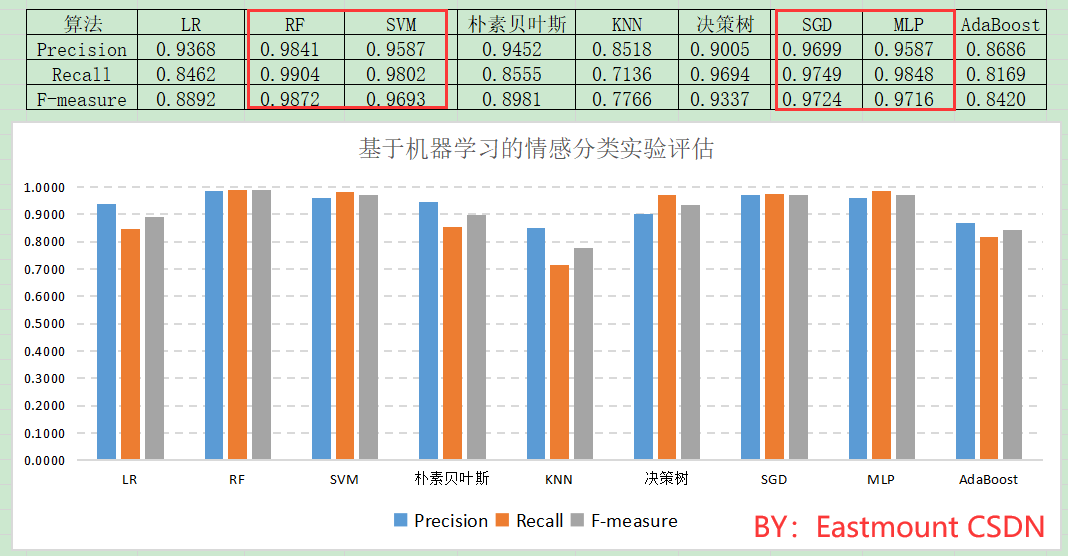